## Prediction using Unsupervised ML on ‘Iris’ dataset.
### Predict the optimum number of clusters and represent it visually.
Dataset : https://bit.ly/3kXTdox

In [1]:
# Importing all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link

data = pd.read_csv('E:/Sparks Foundation/Iris.csv', index_col = 'Id')


data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
del data['Species']

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


Statistical relationship between the variables of the iris dataset.
Here we have used correlation function

In [5]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Graphical Representation of the data

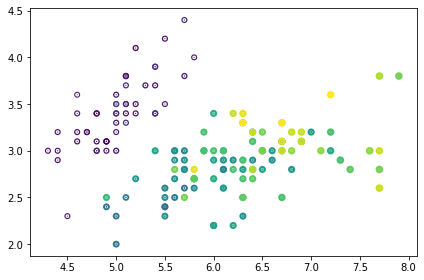

In [6]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'],linewidth = 5)
plt.tight_layout()
plt.show()

Prepairing the data

In [7]:
x = data.iloc[:,:].values

Calculating the number of cluster using Elbow Method

In [16]:
from sklearn.cluster import KMeans

k_range = range(1,11)

sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
sse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 39.20485962280962,
 34.19068792479662,
 29.905374299825105,
 27.941037745879854,
 26.244570468723282]

Text(0.5, 1.0, 'Elbow Method')

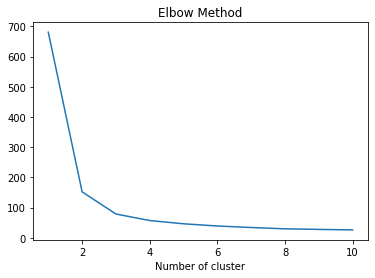

In [17]:
plt.plot(k_range,sse)
plt.xlabel('Number of cluster')
plt.title('Elbow Method')

In [13]:
# Applying Kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

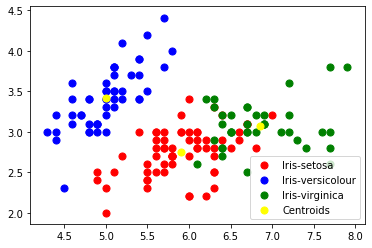

In [14]:
# Visualising the clusters On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

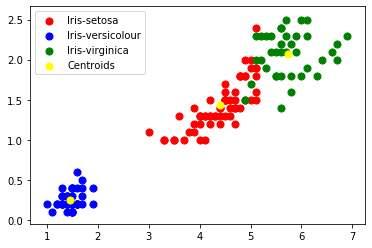

In [15]:
# Visualising the clusters On the last two columns
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()